In [43]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from Model import Model
from PlaceInputs import PlaceInputs
from utils import *
import configs

# Parameters and Initialization

In [44]:
# Parameters
N_inp = 5000
N_bar = 5000
num_states = 100

In [61]:
place_inputs = PlaceInputs(N_inp, num_states).get_inputs()
model = Model(
    N_inp, N_bar, num_states,
    divisive_normalization=1
    )

In [62]:
cache_states = [20, 30, 70]

# Example Narrow/Broad Recall

In [63]:
def recall_plots(cache_identification, narrow_recall, wide_recall):
    fig, ax = plt.subplots(
        1, 3, figsize=(8,2.),
        )
    
    # Identification plot
    readout = np.linalg.norm(cache_identification, axis=1)
    readout /= readout.max()
    ax[0].plot(readout)
    threshold=0.75
    idxs = readout > threshold
    y = readout[idxs]
    y[y>0] = 1.05
    ax[0].scatter(np.arange(100)[idxs], y, s=1, color='red')
    ax[0].set_yticks([0, 0.50, 1.0])
    ax[0].set_ylabel('Output Norm')
    
    # Narrow recall plot
    reconstruct = narrow_recall
    readout = np.linalg.norm(reconstruct, axis=1)
    readout /= readout.max()
    valid_recall = readout > 0.5
    offset = reconstruct.std()/2
    for idx, validity in enumerate(valid_recall):
        if not validity: continue
        r = reconstruct[idx]
        ax[1].plot(np.arange(r.size), r-offset*idx, color='black', linewidth=0.5)
    ax[1].set_yticks([0, -offset*(num_states//2), -offset*(num_states)], [0, '$\pi$', '$2\pi$'])
    
    # Wide recall plot
    reconstruct = wide_recall
    readout = np.linalg.norm(reconstruct, axis=1)
    readout /= readout.max()
    valid_recall = readout > 0.5
    offset = reconstruct.std()/2
    for idx, validity in enumerate(valid_recall):
        if not validity: continue
        r = reconstruct[idx]
        ax[2].plot(np.arange(r.size), r-offset*idx, color='black', linewidth=0.5)
        
    ax[1].set_ylabel('Location')
    ax[2].set_ylabel('')
    ax[2].set_yticks([])
    for _ax in [ax[0]]: # For cache identification
        xtick_loc = []; xtick_label = [];
        for i, c in enumerate(cache_states[:c_idx+1]):
            xtick_loc.append(c)
            xtick_label.append(f'C{i+1}')
    for _ax in ax[1:]: # For recalled place fields
        xtick_loc = []; xtick_label = [];
        for i, c in enumerate(cache_states[:c_idx+1]):
            xtick_loc.append((c/num_states)*N_bar)
            xtick_label.append(f'C{i+1}')
    try: # Only compatible with updated version of Matplotlib
        ax[0].set_xticks(xtick_loc, xtick_label, rotation=45, color='red', fontsize=10)
        ax[1].set_xticks(xtick_loc, xtick_label, rotation=45, color='red', fontsize=10)
        ax[2].set_xticks(xtick_loc, xtick_label, rotation=45, color='red', fontsize=10)
    except:
        pass
    plt.tight_layout()
    plt.show()

Now I just cached at location: 20


/share/apps/anaconda3-2019.03/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()
/share/apps/anaconda3-2019.03/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in greater
/share/apps/anaconda3-2019.03/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in greater


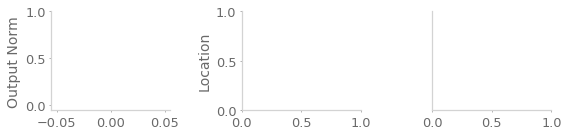

Now I just cached at location: 30


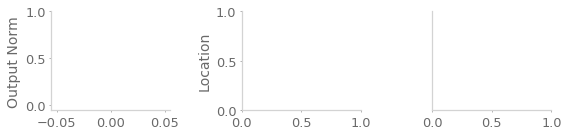

Now I just cached at location: 70


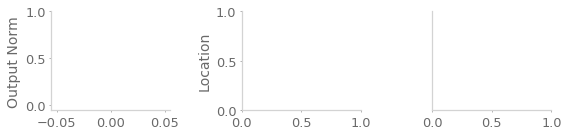

In [64]:
model.reset()

cache_identification = []
narrow_recall = []
wide_recall = []

for c_idx, cache_state in enumerate(cache_states):
    
    print("Now I just cached at location:", cache_state)
    preacts, acts, _, acts_over_time = model.run_recurrent(place_inputs, n_zero_input=20)
    model.update(place_inputs[cache_state], acts[cache_state], preacts[cache_state])

    _, _, _cache_identification, _ = model.run_recall(0.4, place_inputs)
    cache_identification.append(_cache_identification.copy())
    
    _, _, _narrow_recall, _ = model.run_narrow_recall(place_inputs)
    narrow_recall.append(_narrow_recall.copy())
    
    _, _, _wide_recall, _ = model.run_wide_recall(place_inputs)
    wide_recall.append(_wide_recall.copy())

    recall_plots(_cache_identification, _narrow_recall, _wide_recall)